In [ ]:
##Importing the needed libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

##Inputting and reading the file of the data
input_filename = input("Insert the file name: ")
input_range = int(input("How many data samples are there?: "))
input_unit_tipl = input("Insert the unit of TIPL: ") # TIPL is the Intensity of the Photoluminescence
input_unit_density = input("Insert the unit of Carrier Density: ")

data  = pd.read_csv("{0}.csv".format(input_filename))

##Assinging the fitting function and parameters
def func(x, trap_density, a,k):
    #return (trap_density*(1-np.exp(-1*constant*x)))
    return (((trap_density*10**17)*(1-np.exp(-1*a*x/k)))) #You can change the fitting function and variables accordingly

yData = data.carrier_density #set yData to be the carrier density values for the y-axis
for i in range(input_range):
    yData[i] = yData[i]*10**17

# yData = yData[a:b]
# xData = data.time_pl[a:b]
# xFit = data.time_pl[a:b]

xData = data.time_pl #set xData to be the Time Integrated PL for the x-axis
xFit = data.time_pl #set xFit to the x values for the fitting plot

##Plotting the Data
plt.plot(xData, yData, 'bo', label = "experimental-data" )
plt.xlabel("Time-Integrated PL Intensity (" + input_unit_tipl + ")")
plt.ylabel("Carrier Density (" + input_unit_density + ")")

plt.yscale("log") #Assign the y-scale to become a log scale
plt.xscale("log") #Assign the x-scale to become a log scale

##Fitting the Data
popt, pcov = curve_fit(func, xData, yData) #intial guesses can be written after the yData
plt.plot(xFit, func(xFit, *popt), 'r')

##Outputting the fitted Trap and Constant Values
for i in range(3):
    if (i == 0):
        print("The trap density value: " + str(popt[i]))
    elif (i==1):
        print("The lifetime x a_i value: " + str(popt[i]))
    else:
        print("The constant value: "+ str(popt[i]))
        
print(data)

Insert the file name: second_sample
[ 1.18836436 30.33082991 28.71599057]


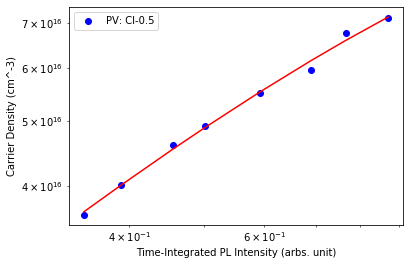

In [22]:
#SLOW TRAP ONE
#Reading the file of the data
input_filename = input("Insert the file name: ")
data  = pd.read_csv("{0}.csv".format(input_filename))

#Assinging the function and variables
def func(x,slowtrap_density,a,k):
    #return (trap_density*(1-np.exp(-1*constant*x)))
    return (((slowtrap_density*10**17)*(1-np.exp(-1*a*x/k))))

yData = data.carrier_density
for i in range(20):
    yData[i] = yData[i]*10**17
    
yData = yData[12:20]
xData = data.time_pl[12:20]
xFit = data.time_pl[12:20]

#Plotting the Data
plt.plot(xData, yData, 'bo', label = "experimental-data" )
plt.xlabel("Time-Integrated PL Intensity (arbs. unit)")
plt.ylabel("Carrier Density (cm^-3)")

    
plt.yscale("log") #Assign the y-scale to become a log scale
plt.xscale("log")
#Fitting the Data
popt, pcov = curve_fit(func, xData, yData) #intial guesses can be written after the yData
plt.plot(xFit, func(xFit, *popt), 'r')

#Outputting the fitted Trap and Constant Values
# for i in range(2):
#     if (i == 0):
#         print("This is the trap density value: " + str(popt[i]))
#     else:
#         print("This is the constant value: "+ str(popt[i]))

print(popt)

Insert the file name: second_sample
[1.93411789e-01 3.93306287e+02]


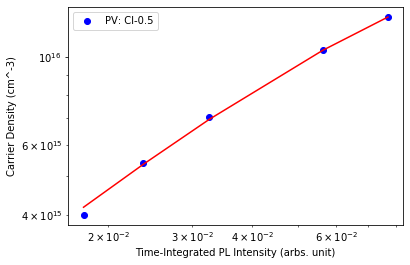

In [24]:
#FAST TRAP ONE
#Reading the file of the data
input_filename = input("Insert the file name: ")
data  = pd.read_csv("{0}.csv".format(input_filename))

#Assinging the function and variables
def func(x, fasttrap,a):
    #return (trap_density*(1-np.exp(-1*constant*x)))
    return (((fasttrap*10**17)*(1-np.exp(-1*a*x/28.71599057))))

yData = data.carrier_density
for i in range(20):
    yData[i] = yData[i]*10**17
    
yData = yData[3:8]
xData = data.time_pl[3:8]
xFit = data.time_pl[3:8]

#Plotting the Data
plt.plot(xData, yData, 'bo', label = "experimental-data" )
plt.xlabel("Time-Integrated PL Intensity (arbs. unit)")
plt.ylabel("Carrier Density (cm^-3)")

if input_filename == "first_sample":
    plt.legend(["PV: Cl-0", "Fitted Line"])
elif input_filename == "second_sample":
    plt.legend(["PV: Cl-0.5", "Fitted Line"])
elif input_filename == "third_sample":
    plt.legend(["PV: Cl-1", "Fitted Line"])
    
plt.yscale("log") #Assign the y-scale to become a log scale
#plt.xscale("log")
plt.xscale("log")
#Fitting the Data
popt, pcov = curve_fit(func, xData, yData) #intial guesses can be written after the yData
plt.plot(xFit, func(xFit, *popt), 'r')

#Outputting the fitted Trap and Constant Values
# for i in range(2):
#     if (i == 0):
#         print("This is the trap density value: " + str(popt[i]))
#     else:
#         print("This is the constant value: "+ str(popt[i]))

print(popt)

Insert the file name: second_sample
[1.05408231 0.04126822]


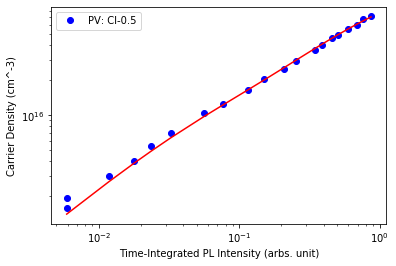

In [3]:
##THIS IS FOR THE SLOW AND FAST TRAP FITTING

#Reading the file of the data
input_filename = input("Insert the file name: ")
data  = pd.read_csv("{0}.csv".format(input_filename))

#Assinging the function and variables
def func(x,slowtrap,fasttrap):
    #return (trap_density*(1-np.exp(-1*constant*x)))
    return ((slowtrap*10**17)*(1-np.exp(-1*30.33082991*x/28.71599057)))+((fasttrap*10**17)*(1-np.exp(-1*932.82424254*x/28.71599057))+x*(10**17)/28.71599057)
#1.18836436, 120
yData = data.carrier_density
for i in range(20):
    yData[i] = yData[i]*10**17
    
xData = data.time_pl
xFit = data.time_pl

#Plotting the Data
plt.plot(xData, yData, 'bo', label = "experimental-data" )
plt.xlabel("Time-Integrated PL Intensity (arbs. unit)")
plt.ylabel("Carrier Density (cm^-3)")

if input_filename == "first_sample":
    plt.legend(["PV: Cl-0", "Fitted Line"])
elif input_filename == "second_sample":
    plt.legend(["PV: Cl-0.5", "Fitted Line"])
elif input_filename == "third_sample":
    plt.legend(["PV: Cl-1", "Fitted Line"])
    
plt.yscale("log") #Assign the y-scale to become a log scale

plt.xscale("log")
#Fitting the Data
popt, pcov = curve_fit(func, xData, yData) #intial guesses can be written after the yData
plt.plot(xFit, func(xFit, *popt), 'r')

#Outputting the fitted Trap and Constant Values
# for i in range(2):
#     if (i == 0):
#         print("This is the trap density value: " + str(popt[i]))
#     else:
#         print("This is the constant value: "+ str(popt[i]))

print(popt)

Insert the file name: second_sample
[1.03896011 0.0437605 ]


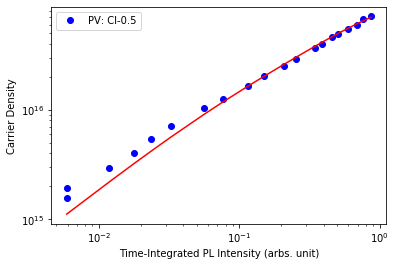

In [20]:
##THIS IS FOR THE SLOW AND FAST TRAP FITTING

#Reading the file of the data
input_filename = input("Insert the file name: ")
data  = pd.read_csv("{0}.csv".format(input_filename))

#Assinging the function and variables
def func(x,slowtrap,fasttrap):
    #return (trap_density*(1-np.exp(-1*constant*x)))
    return ((slowtrap*10**17)*(1-np.exp(-1*59.03973324*x/53.57689104)))+((fasttrap*10**17)*(1-np.exp(-1*932.82424254*x/53.57689104))+x*(10**17)/53.57689104)
#1.18836436, 120
yData = data.carrier_density
for i in range(20):
    yData[i] = yData[i]*10**17
    
xData = data.time_pl
xFit = data.time_pl

#Plotting the Data
plt.plot(xData, yData, 'bo', label = "experimental-data" )
plt.xlabel("Time-Integrated PL Intensity (arbs. unit)")
plt.ylabel("Carrier Density")

if input_filename == "first_sample":
    plt.legend(["PV: Cl-0", "Fitted Line"])
elif input_filename == "second_sample":
    plt.legend(["PV: Cl-0.5", "Fitted Line"])
elif input_filename == "third_sample":
    plt.legend(["PV: Cl-1", "Fitted Line"])
    
plt.yscale("log") #Assign the y-scale to become a log scale

plt.xscale("log")
#Fitting the Data
popt, pcov = curve_fit(func, xData, yData) #intial guesses can be written after the yData
plt.plot(xFit, func(xFit, *popt), 'r')

#Outputting the fitted Trap and Constant Values
# for i in range(2):
#     if (i == 0):
#         print("This is the trap density value: " + str(popt[i]))
#     else:
#         print("This is the constant value: "+ str(popt[i]))

print(popt)

Insert the file name: 075_newsample
[1. 1.]


C:\Users\micha\Anaconda2\envs\p36workshop\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


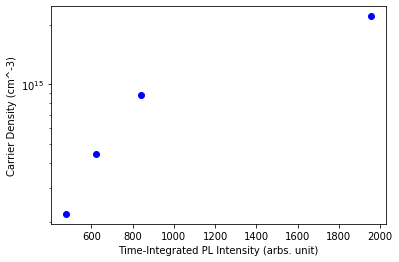

In [38]:
#075 NEW SAMPLEEEEEEEE
#Reading the file of the data
input_filename = input("Insert the file name: ")
data  = pd.read_csv("{0}.csv".format(input_filename))

#Assinging the function and variables
def func(x,a,k):
    #return (A*10**17*(np.exp(-x/b))+k)
    return (((4.21160511917628*10**15)*(1-np.exp(-1*a*x/k))))
#179.68773879, 23.6877995

yData = data.carrier_density
# for i in range(20):
#     yData[i] = yData[i]*10**17
    
yData = yData[0:4]
xData = data.time_pl
# for i in range(8):
#     xData[i] = xData[i]/xData[7]
    

xData = xData[0:4]    
xFit = xData


#Plotting the Data
plt.plot(xData, yData, 'bo', label = "experimental-data" )
plt.xlabel("Time-Integrated PL Intensity (arbs. unit)")
plt.ylabel("Carrier Density (cm^-3)")

# if input_filename == "first_sample":
#     plt.legend(["PV: Cl-0", "Fitted Line"])
# elif input_filename == "second_sample":
#     plt.legend(["PV: Cl-0.5", "Fitted Line"])
# elif input_filename == "third_sample":
#     plt.legend(["PV: Cl-1", "Fitted Line"])
    
plt.yscale("log") #Assign the y-scale to become a log scale
#plt.xscale("log")

#Fitting the Data
popt, pcov = curve_fit(func, xData, yData) #intial guesses can be written after the yData
#plt.plot(xFit, func(xFit, *popt), 'r')

#Outputting the fitted Trap and Constant Values
# for i in range(2):
#     if (i == 0):
#         print("This is the trap density value: " + str(popt[i]))
#     else:
#         print("This is the constant value: "+ str(popt[i]))

print(popt)